**Classical Logistic Regression**
In this practical exercise, we will devlop a classification system that detects whether an email is a spam or not.

> **The Data:**

Please, make sure to download the data from the following link: https://docs.google.com/spreadsheets/d/1VjAQtf0qbQT8ee2RiHOoF4lH_EqDUhJ5KS_JlScvQxY/edit?usp=sharing

It is worth noting that the original data (.csv) have been dowloaded from: https://github.com/niladri-1/Spam-Email-Classification/blob/main/spam.csv

Following that, please upload it to your Google collab repository.

**Details:**

>* Data cleaning: NaNs, decsription that are just Links, etc.
>* Formatting: lower case, removal of special caracters, URL, email adresses,translation to english.
>* Engineering: Vectorisation and padding: bags of words (countTokenizer), TF-IDF, Text Embedding (Doc2vec)
>* Classification: Logisitic regression


**Data Overview:**

1. **Entries:**
>* Description

2. **Outputs**
>* Spam or not spam


In [ ]:
pip install googletrans

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.6 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15719 sha256=6f893615a4a30f3dbd9da3e302731ad9bf0f27d25bd9b05e230e5cced9e33b5f
  Stored in directory: /root/.cache/pip/wheels/b3/81/ea/8b030407f8ebfc2f857814e086bb22ca2d4fea1a7be63652ab
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Success

In [ ]:
pip install translators

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.3 MB/s eta 0:00:00
  Created wheel for PyExecJS: filename=PyExecJS-1.5.1-py3-none-any.whl size=14576 sha256=ad6661f416443df5da876bca4019941535d924f791398819e5b6f3813c91b984
  Stored in directory: /root/.cache/pip/wheels/9d/91/30/28e6da53d4f44dc445349b2ffad581968447e4cbc9dd7991b8
Successfully built PyExecJS


In [ ]:
pip install deep-translator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.0 MB/s eta 0:00:00


In [ ]:
# import data
from google.colab import drive
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import joblib
import os
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


raw_data1 = pd.read_excel('spam.xlsx')
raw_data2 = raw_data1.iloc[:10]
raw_data = pd.concat([raw_data2], axis=0)

raw_data

,class,content,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [ ]:
data= raw_data[["content","class"]]
data


,content,class
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
5,FreeMsg Hey there darling it's been 3 week's n...,spam
6,Even my brother is not like to speak with me. ...,ham
7,As per your request 'Melle Melle (Oru Minnamin...,ham
8,WINNER!! As a valued network customer you have...,spam
9,Had your mobile 11 months or more? U R entitle...,spam


In [ ]:
# Clean Data: Removing Nans and "Websites"

data_aux1 = data.dropna()
data_aux2 = data_aux1[(data_aux1['class'] != 0)]
data_aux2 = data_aux2.reset_index(drop=True)

data_aux2

,content,class
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
5,FreeMsg Hey there darling it's been 3 week's n...,spam
6,Even my brother is not like to speak with me. ...,ham
7,As per your request 'Melle Melle (Oru Minnamin...,ham
8,WINNER!! As a valued network customer you have...,spam
9,Had your mobile 11 months or more? U R entitle...,spam


In [ ]:
# Delete the description that are just links

import re

p = re.compile('https://*', re.IGNORECASE)
data_aux3 = data_aux2.copy(deep=True)
for i in range (len(data_aux2)):
  if (p.match(data_aux2.iloc[i]['content']) != None):

    data_aux3 = data_aux3.drop(i)

data_aux3 = data_aux3.reset_index(drop=True)

data_aux3

,content,class
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
5,FreeMsg Hey there darling it's been 3 week's n...,spam
6,Even my brother is not like to speak with me. ...,ham
7,As per your request 'Melle Melle (Oru Minnamin...,ham
8,WINNER!! As a valued network customer you have...,spam
9,Had your mobile 11 months or more? U R entitle...,spam


In [ ]:
# Final formatted and cleaned data + conversion to lower case

data_aux4 = data_aux3[["content","class"]]
data_aux4['content'] = data_aux4['content'].str.lower()
data_aux4


,content,class
0,"go until jurong point, crazy.. available only ...",ham
1,ok lar... joking wif u oni...,ham
2,free entry in 2 a wkly comp to win fa cup fina...,spam
3,u dun say so early hor... u c already then say...,ham
4,"nah i don't think he goes to usf, he lives aro...",ham
5,freemsg hey there darling it's been 3 week's n...,spam
6,even my brother is not like to speak with me. ...,ham
7,as per your request 'melle melle (oru minnamin...,ham
8,winner!! as a valued network customer you have...,spam
9,had your mobile 11 months or more? u r entitle...,spam


In [ ]:
# delete the special characters

import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|,;.#\-*:"_\?\>]')
EMAILS_RE = re.compile(r'[\w.+-]+@[\w-]+\.[\w.-]+')
LINKS_RE = re.compile('(http|https)://[\w\-]+(\.[\w\-]+)+\S*')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string

        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = EMAILS_RE.sub(' ', text) # delete emails
    text = LINKS_RE.sub(' ', text) # delete links
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # delete special characters

    #text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

data_aux4['content'] = data_aux4['content'].apply(clean_text)
data_aux4

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content,class
0,go until jurong point crazy available only ...,ham
1,ok lar joking wif u oni,ham
2,free entry in 2 a wkly comp to win fa cup fina...,spam
3,u dun say so early hor u c already then say,ham
4,nah i don't think he goes to usf he lives aro...,ham
5,freemsg hey there darling it's been 3 week's n...,spam
6,even my brother is not like to speak with me ...,ham
7,as per your request 'melle melle oru minnamin...,ham
8,winner!! as a valued network customer you have...,spam
9,had your mobile 11 months or more u r entitle...,spam


In [ ]:
# convert the target "class" for regression to "labels" for multi-class classification

data_label = data_aux4.copy(deep=True)
data_label = data_label.reset_index(drop=True)
data_label['label']= 0

for i in range(len(data_label)):
  class_category = 0
  for j in range (2):
    if data_label.at[i,'class'] == "ham":
        class_category = 0
    elif data_label.at[i,'class'] == "spam":
        class_category = 1
  data_label.at[i,'label'] = class_category

data_label


,content,class,label
0,go until jurong point crazy available only ...,ham,0
1,ok lar joking wif u oni,ham,0
2,free entry in 2 a wkly comp to win fa cup fina...,spam,1
3,u dun say so early hor u c already then say,ham,0
4,nah i don't think he goes to usf he lives aro...,ham,0
5,freemsg hey there darling it's been 3 week's n...,spam,1
6,even my brother is not like to speak with me ...,ham,0
7,as per your request 'melle melle oru minnamin...,ham,0
8,winner!! as a valued network customer you have...,spam,1
9,had your mobile 11 months or more u r entitle...,spam,1


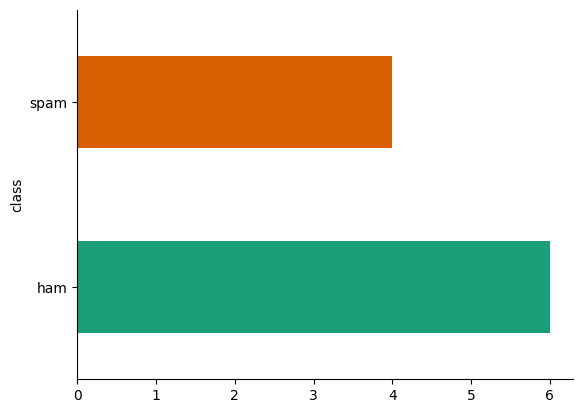

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
data_label.groupby('class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Format Data as Description Label

data_label = data_label[['content','label']]
data_label

,content,label
0,go until jurong point crazy available only ...,0
1,ok lar joking wif u oni,0
2,free entry in 2 a wkly comp to win fa cup fina...,1
3,u dun say so early hor u c already then say,0
4,nah i don't think he goes to usf he lives aro...,0
5,freemsg hey there darling it's been 3 week's n...,1
6,even my brother is not like to speak with me ...,0
7,as per your request 'melle melle oru minnamin...,0
8,winner!! as a valued network customer you have...,1
9,had your mobile 11 months or more u r entitle...,1


In [ ]:
data_label['content'].apply(lambda x: len(x.split(' '))).sum()
X = data_label.content
y = data_label.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 100)

accuracy 0.0

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       3.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

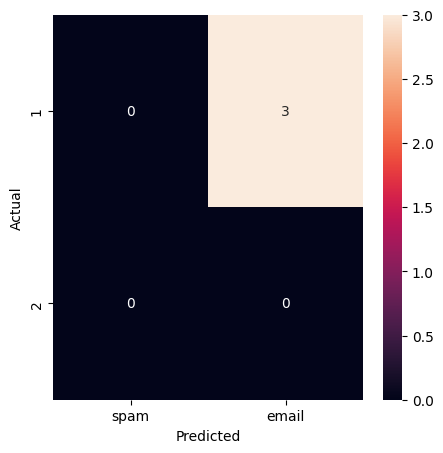

Convolution Matrix: 
 [[0 3]
 [0 0]] 

Number of Correct Predictions:0


In [ ]:
# Linear Support Vector Machine

from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=100, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print('\n',classification_report(y_test, y_pred))


comparison_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=["spam","email"], yticklabels=[1, 2])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

correct_predictions = 0

for yt, yp in zip(y_test, y_pred):
    if yt == yp:
        correct_predictions += 1

print(f'Convolution Matrix: \n {conf_mat} \n')
print(f'Number of Correct Predictions:{correct_predictions}')

In [ ]:
# print the dataframe with both the test and predicted data
comparison_df

,Actual,Predicted
7,0,1
6,0,1
1,0,1


accuracy 0.0

               precision    recall  f1-score   support

        spam       0.00      0.00      0.00       3.0
       email       0.00      0.00      0.00       0.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

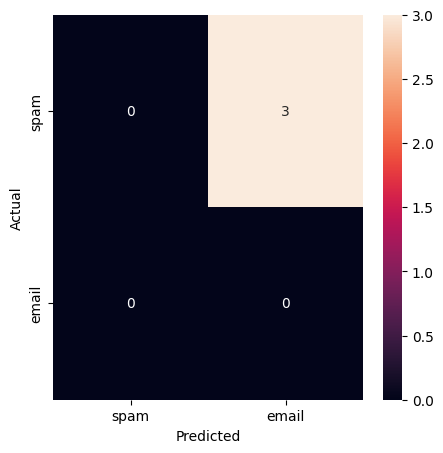

Convolution Matrix: 
 [[0 3]
 [0 0]] 

Number of Correct Predictions:0


In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print('\n',classification_report(y_test, y_pred,target_names=["spam","email"]))


comparison_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=["spam","email"], yticklabels=["spam","email"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

correct_predictions = 0

for yt, yp in zip(y_test, y_pred):
    if yt == yp:
        correct_predictions += 1

print(f'Convolution Matrix: \n {conf_mat} \n')
print(f'Number of Correct Predictions:{correct_predictions}')